# Workflow & Hyperparameter Optimization

In [152]:
import pandas as pd
import seaborn as sns
import numpy as np

🏠 Import the house price data set. We will keep only numerical features for the sake of simplicity

🎯 Your goal will be to fit the best KNN Regressor. In particular, how many "neighbors" (<font color=blue>K</font> in <font color=blue>K</font>NN) should you consider to get the best predictions for your house prices ?

In [153]:
# Load raw data
data = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/houses_train_raw.csv', index_col="Id")

# Only keep numerical columns and raws without NaN
data = data.select_dtypes(include=np.number).dropna()

data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


In [154]:
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

## 1. Train/Test split

❓ **Question (Holdout)**❓

👇 Split the dataset to create your `X_train` `X_test` and `y_train` `y_test`. Use:
- `test_size=0.3`
- `random_state=0` to compare your results with your buddy

In [155]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X =  pd.DataFrame(X_scaled, columns=X.columns)
X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.092295,-0.233570,-0.205885,0.570704,-0.525499,0.992930,0.823953,0.462009,0.571581,-0.282645,...,0.235641,-0.760257,0.231036,-0.356622,-0.11253,-0.278676,-0.072999,-0.141407,-1.615345,0.153084
1,-0.865696,0.384834,-0.064358,-0.153825,2.284122,0.120665,-0.460746,-0.572748,1.152559,-0.282645,...,-0.224712,1.686090,-0.716739,-0.356622,-0.11253,-0.278676,-0.072999,-0.141407,-0.498715,-0.596291
2,0.092295,-0.109889,0.138702,0.570704,-0.525499,0.928317,0.776371,0.282510,0.101672,-0.282645,...,0.549518,-0.760257,-0.064173,-0.356622,-0.11253,-0.278676,-0.072999,-0.141407,0.990125,0.153084
3,0.331793,-0.439705,-0.070512,0.570704,-0.525499,-1.850006,-0.746235,-0.572748,-0.475034,-0.282645,...,0.727382,-0.760257,-0.172934,4.083851,-0.11253,-0.278676,-0.072999,-0.141407,-1.615345,-1.345665
4,0.092295,0.549742,0.509132,1.295234,-0.525499,0.896011,0.681208,1.275032,0.462647,-0.282645,...,1.742250,0.815913,0.588393,-0.356622,-0.11253,-0.278676,-0.072999,-0.141407,2.106755,0.153084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,0.092295,-0.357251,-0.271480,-0.153825,-0.525499,0.863705,0.681208,-0.572748,-0.936399,-0.282645,...,-0.224712,-0.760257,-0.095247,-0.356622,-0.11253,-0.278676,-0.072999,-0.141407,0.617915,-0.596291
1117,-0.865696,0.590968,0.375605,-0.153825,0.411042,0.185277,0.110231,0.055497,0.751000,0.750581,...,-0.015461,2.104761,-0.716739,-0.356622,-0.11253,-0.278676,-0.072999,-0.141407,-1.615345,1.651832
1118,0.331793,-0.192343,-0.133030,0.570704,3.220663,-1.010048,0.966697,-0.572748,-0.349013,-0.282645,...,-1.312819,-0.760257,0.215498,-0.356622,-0.11253,-0.278676,-0.072999,14.947388,-0.498715,1.651832
1119,-0.865696,-0.109889,-0.049960,-0.878355,0.411042,-0.719293,0.490883,-0.572748,-0.831738,6.239990,...,-1.375594,2.244317,-0.716739,1.471808,-0.11253,-0.278676,-0.072999,-0.141407,-0.870925,1.651832


In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 2. Scaling

⚖️ Scaling is always crucially important for the KNN algorithm..

❓ **Question (Scaling)** ❓ 

* Scale your train set and test set.
* Here, let's simply apply the `StandardScaler` and not waste time choosing one scaler per feature. Indeed, the goals of this exercise are to:
    * review KNN
    * understand GridSearchCV
    * understand RandomizedSearchCV

## 3. Baseline KNN model

❓ **Question (A baseline for our KNN)** ❓

Cross-validate (*cv = 5*) a simple KNN regressor taking into account only _the closest neighbor_, and compute the average score over the 5 folds.

In [157]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=1)
        
knn_results = cross_validate(knn,
                           X_train,
                           y_train,
                           cv=5)


knn_score = knn_results['test_score'].mean()
knn_score

0.551226467903157

## 4. GridSearch

### 4.1. A first GridSearch

❓ **Question (GridSearch v1)**❓

Let's use SKLearn `GridSearchCV` to find the best KNN hyperparameter `n_neighbors`.
- Start a coarse-grain approach, with `n_neighbors` = [1,5,10,20,50]
- 5-fold cross-validate each parameter
- Make sure to maximize your performance time using `n_jobs`

In [158]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Instantiate model
knn = KNeighborsRegressor()

# Hyperparameter Grid
grid = {
 'n_neighbors': [1,5,10,20,50]
}

# Instantiate Grid Search
search = GridSearchCV(knn, grid, scoring='r2', cv=5, n_jobs=-1)


# Fit data to Grid Search
search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 5, 10, 20, 50]}, scoring='r2')

❓ **Question (best parameters)** ❓

According to the GridSearch, what is the optimal K value?

In [159]:
search.best_params_

{'n_neighbors': 10}

❓ **Question (scoring)** ❓ What is the best score the optimal K value produced?

In [160]:
search.best_score_

0.7599187291275744

### 4.2. A second GridSearch

❓ **Question (GridSearch V2)** ❓


Now, we have an idea about where the best $K$ lies, but some of the values we didn't try could result in a  better performance.

* Re-run a GridSearch trying some values for $K$ around to your previous best value
* What are the `best_score` and `best_k` for this refined GridSearch?

In [209]:
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV

# Instantiate model
knn2 = KNeighborsRegressor()

# Hyperparameter Grid
grid2 = {
 'n_neighbors': stats.randint(1,50)
}

# Instantiate Grid Search
search2 = RandomizedSearchCV(knn2, grid2, scoring='r2', cv=10, n_jobs=-1, n_iter=50)


# Fit data to Grid Search
search2.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=KNeighborsRegressor(), n_iter=50, n_jobs=-1,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x717c35fb9a20>},
                   scoring='r2')

In [210]:
search2.best_score_

0.7696036132244898

In [211]:
search2.best_params_['n_neighbors']

17

In [164]:
best_score = search2.best_score_
best_k = search2.best_params_['n_neighbors']

***🧪 Test your code***

In [212]:
from nbresult import ChallengeResult
result = ChallengeResult('knn',
                         best_k=best_k,
                         best_score=best_score)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/andreza/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/andreza/code/andrezaumbelino/05-ML/05-Model-Tuning/data-workflow/tests
plugins: typeguard-2.13.3, asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_knn.py::TestKnn::test_best_k PASSED                                 [ 50%]
test_knn.py::TestKnn::test_best_score PASSED                             [100%]

============================== 2 passed in 0.16s ===============================


💯 You can commit your code:

git add tests/knn.pickle

git commit -m 'Completed knn step'

git push origin master



### 4.3. Visual check (manual GridSearch)

☝️ This problem is actually simple enough to perform a GridSearch manually.

❓ **Question(Manual GridSearch)** ❓

- Loop manually over all values of $K$ from $1$ to $50$ and store the average of the cross-validated scores of each model in a list.
- Plot the scores as a function of $K$ to visually find the best $K$ using the `Elbow Method`

In [195]:
knn_score3 = [] 

for number in range(1,51):
    knn3 = KNeighborsRegressor(n_neighbors=number)
        
    knn_result = cross_validate(knn3,
                           X_train,
                           y_train,
                           cv=5)

    knn_result_mean = knn_result['test_score'].mean()
    knn_score3.append(knn_result_mean)

knn_score3      

[0.551226467903157,
 0.7057890682056753,
 0.7227536896025075,
 0.7439761180333149,
 0.7426092574690702,
 0.7505479654316604,
 0.7560846850373713,
 0.7634906640903334,
 0.761668769163806,
 0.7599187291275744,
 0.7590462337340689,
 0.7577210006119319,
 0.7590367870172562,
 0.7618521493763034,
 0.7614378863212687,
 0.7619514579945538,
 0.7604161782977462,
 0.758756287984239,
 0.7606611803736447,
 0.7592841045015712,
 0.7573375731425719,
 0.757574946586487,
 0.7563169773256545,
 0.7560602597783606,
 0.7554204523529529,
 0.7546958574448223,
 0.7541480032964382,
 0.7517500408204062,
 0.7502638027454804,
 0.7482885534907159,
 0.7462616566607541,
 0.7449801223759078,
 0.7443163156839498,
 0.7432276538594612,
 0.7412603764320389,
 0.7396552809784296,
 0.7375084407777175,
 0.7364203006396208,
 0.734185630155616,
 0.7333423452869319,
 0.732644976589413,
 0.7310246983467755,
 0.730063715020024,
 0.7308147683318506,
 0.7295923717229662,
 0.7294067147260735,
 0.7282565115205154,
 0.726911727864795,


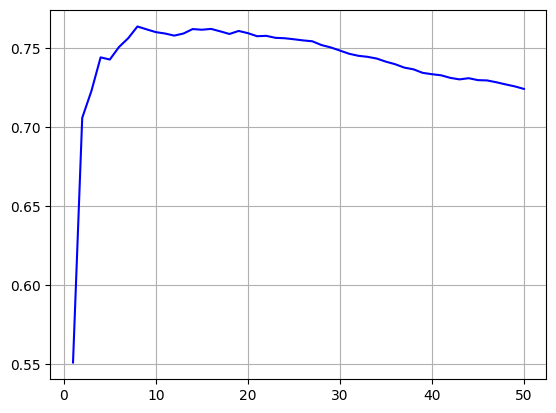

In [183]:
import matplotlib.pyplot as plt
plt.plot(range(1,51), knn_score3 , label='score', color='blue')
plt.grid(True)
plt.show()

❓Can you guess what makes GridSearchCV a better option than such manual loop ?


<details>
    <summary>Answer</summary>

- Sklearn's `n_jobs=-1` allows you to parallelize the search, utilizing all of your CPU cores
- What if you had multiple hyper-parameters to co-optimize?
</details>

## 5. GridSearch with multiple parameters

👩🏻‍🏫 KNNRegressor suppports various _distance metrics_ via the hyper-parameter `p` 

📚 [sklearn.neighbors.KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

❓ **Question (tuning multiple parameters)** ❓


* Use GridSearchCV to search for the best $K$ and $p$ simultaneously.
    * Try all combinations for $K = [1, 5, 10, 20, 50]$ and $p = [1, 2, 3]$. 

In [208]:
# Instantiate model
knn4 = KNeighborsRegressor()

# Hyperparameter Grid
grid4 = {
 'n_neighbors': [1,5,10,20,50],'p': [1,2,3]
}

# Instantiate Grid Search
search4 = GridSearchCV(knn4, grid4, scoring='r2', cv=5, n_jobs=-1)


# Fit data to Grid Search
search4.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 5, 10, 20, 50], 'p': [1, 2, 3]},
             scoring='r2')

❓ **Question (number of submodels)**❓

How many submodels did you train overall?

<details>
    <summary>Hint</summary>

Much more than 15. Think twice :)
    <details>
    <summary>Answer</summary>

75 models due to CV=5
</details>

In [185]:
submodels = 3*5*5

❓ **Question (best parameters and best score after tuning the model with multiple parameters)**❓

What are the *best parameters* and the *best score*?

In [186]:
search4.best_score_

0.7949862338558854

In [197]:
search4.best_params_

{'n_neighbors': 10, 'p': 1}

## 6. Random Search

Now let's see whether a RandomizedSearch can find a better combination with the same number of models being fitted.

❓ **Question (RandomizedSearchCV)** ❓

Use `RandomizedSearchCV` to
- Randomly sample $K$ from a uniform `scipy.stats.randint(1,50)` ([doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.randint.html)) distribution
- Sample $p$ from a list $[1,2,3]$
- Use the correct numbers of `n_iter` and `cv` to fit the exact same numbers of models as in your previous GridSearchCV.

In [205]:
# Instantiate model
knn5 = KNeighborsRegressor()

# Hyperparameter Grid
grid5 = {
 'n_neighbors': stats.randint(1,50),'p': [1,2,3]
}

# Instantiate Grid Search
search5 = RandomizedSearchCV(knn5, grid5, scoring='r2', cv=5, n_jobs=-1, n_iter=50)


# Fit data to Grid Search
search5.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_iter=50, n_jobs=-1,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x717c3603b2b0>,
                                        'p': [1, 2, 3]},
                   scoring='r2')

In [206]:
search5.best_score_

0.7947089735271412

In [207]:
search5.best_params_

{'n_neighbors': 9, 'p': 1}

## 7. Generalization

❓ **Question (finetuning your model one more time)**❓

- Refine your RandomsearchCV if you want
- Choose your best model

In [215]:
search5.cv_results_

{'mean_fit_time': array([0.01661353, 0.01987309, 0.02794809, 0.01070428, 0.00495887,
        0.002912  , 0.00263739, 0.00261731, 0.00248346, 0.00356059,
        0.0035224 , 0.00465102, 0.00315146, 0.00299516, 0.00289702,
        0.00315676, 0.00302663, 0.00338616, 0.00543208, 0.00274897,
        0.0028625 , 0.00269027, 0.00315886, 0.00254278, 0.00364461,
        0.00306563, 0.00345712, 0.00657601, 0.00502863, 0.00446887,
        0.00428119, 0.00260158, 0.00280614, 0.0025394 , 0.00239506,
        0.00260501, 0.00290952, 0.00262799, 0.00226002, 0.00196595,
        0.00232882, 0.00251274, 0.0027596 , 0.00245061, 0.00183921,
        0.00237932, 0.00292459, 0.00236516, 0.0033474 , 0.00290699]),
 'std_fit_time': array([4.97013680e-03, 4.13812068e-03, 1.01161192e-02, 6.46756468e-03,
        4.58733515e-03, 3.02682970e-04, 1.16752096e-04, 3.31768800e-04,
        1.01270222e-04, 1.34223282e-03, 9.79777999e-04, 3.56920389e-03,
        8.14032739e-04, 1.21081208e-04, 5.59129378e-04, 2.37543101e-0

Now try to display your `cv_results` as a `DataFrame`, this will help you visualize what's going on inside the CV! 😉

In [214]:
results_df = pd.DataFrame(search5.cv_results_)
results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016614,0.004970,0.022664,0.005966,9,2,"{'n_neighbors': 9, 'p': 2}",0.714952,0.805292,0.719251,0.846312,0.722538,0.761669,0.054001,9
1,0.019873,0.004138,0.679639,0.042183,44,3,"{'n_neighbors': 44, 'p': 3}",0.702807,0.753641,0.649058,0.734536,0.659739,0.699956,0.040728,45
2,0.027948,0.010116,0.499243,0.281688,40,3,"{'n_neighbors': 40, 'p': 3}",0.703631,0.757585,0.651190,0.744499,0.661329,0.703647,0.042710,44
3,0.010704,0.006468,0.020583,0.010290,40,1,"{'n_neighbors': 40, 'p': 1}",0.758044,0.798632,0.710450,0.791023,0.725393,0.756708,0.034806,17
4,0.004959,0.004587,0.004742,0.000429,27,2,"{'n_neighbors': 27, 'p': 2}",0.740959,0.804302,0.699526,0.793699,0.732254,0.754148,0.039285,20


❓ **Question (Evaluation of the "best" model)** ❓

* Time has come to discover our model's performance with "best params" on the **unseen** test set `X_test`.
    * Compute the r2 score for the test set and save it as `r2_test`.

In [ ]:
knn6 = KNeighborsRegressor(n_neighbors=9, p=1)
        
model.fit(X_train, y_train)


knn_score = knn_results['test_score'].mean()
knn_score

❓ **Question (Taking a step back)** ❓

Would you consider the optimized model to generalize well?

<details><summary>Answer</summary>

Test score may decrease a bit with train set. Probably not more than 5%. This can be due to
- A non-representative train/test split
- A cross-val number too small leading to overfitting the model-tuning phase. The more you cross-validated, the more robust your findings will generalize - but you can't increase cv too much if your dataset is too small as you won't keep enough observations in each fold to be representative.
- Our dataset is very small and our hyperparameter optimization is thus extremely dependent (and overfitting) on our train/test split. Always make sure your dataset is much bigger than the total number of hyperparameter combinations you are trying out!
    
</details>

***🧪 Test your code***

In [ ]:
from nbresult import ChallengeResult
result = ChallengeResult('r2', 
                         r2_test=r2_test)
result.write()
print(result.check())

🏁 Congratulations! Now, you know how to finetune a model using either a GridSearchCV or a RandomizedSearchCV 

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!